In [1]:
import pandas as panda
import numpy as np
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = panda.read_csv("labeled_data.csv")
data

,Unnamed: 0,count,angry,happy,neither,class,tweet
0,1,3,0,3,0,1,""" Keeks is a bitch she curves everyone "" lol I..."
1,2,3,0,3,0,1,""" Murda Gang bitch its Gang Land """
2,3,3,0,2,1,1,""" So hoes that smoke are losers ? "" yea ... go..."
3,4,3,0,3,0,1,""" bad bitches is the only thing that i like """
4,5,3,1,2,0,1,""" bitch get up off me """
...,...,...,...,...,...,...,...
24768,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24769,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24770,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24771,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24773 entries, 0 to 24772
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24773 non-null  int64 
 1   count       24773 non-null  int64 
 2   angry       24773 non-null  int64 
 3   happy       24773 non-null  int64 
 4   neither     24773 non-null  int64 
 5   class       24773 non-null  int64 
 6   tweet       24773 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


<AxesSubplot:>

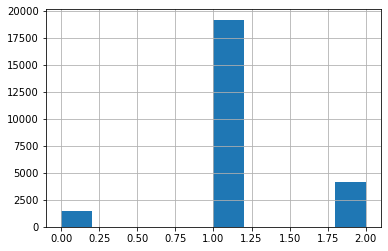

In [4]:
data['class'].hist()

In [5]:
tweet=data.tweet

In [6]:
def remove_space(tweet):  
    
    
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')    
    newtweet=tweet.str.replace(r'\s+', ' ')    
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')   
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    tweet_lower = newtweet.str.lower()
    
    return tweet_lower

In [7]:
tweets_space= remove_space(tweet)
data["tweets_w/o_space"]=tweets_space
data.head()

<ipython-input-6-5f5475067ae5>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=tweet.str.replace(r'\s+', ' ')
<ipython-input-6-5f5475067ae5>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-6-5f5475067ae5>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


,Unnamed: 0,count,angry,happy,neither,class,tweet,tweets_w/o_space
0,1,3,0,3,0,1,""" Keeks is a bitch she curves everyone "" lol I...",""" keeks is a bitch she curves everyone "" lol i..."
1,2,3,0,3,0,1,""" Murda Gang bitch its Gang Land """,""" murda gang bitch its gang land """
2,3,3,0,2,1,1,""" So hoes that smoke are losers ? "" yea ... go...",""" so hoes that smoke are losers ? "" yea ... go..."
3,4,3,0,3,0,1,""" bad bitches is the only thing that i like """,""" bad bitches is the only thing that i like """
4,5,3,1,2,0,1,""" bitch get up off me """,""" bitch get up off me """


In [8]:
def remove_urls(tweet):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', tweet)

data["tweet_w/o_url"] = data["tweets_w/o_space"].apply(lambda tweet: remove_urls(tweet))

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

data['tweet_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',tweet)) for tweet in lis]) 
                     for lis in data['tweet_w/o_url']]

In [11]:
data["tokenized_tweet"] = data["tweet_lem"].apply(lambda x: x.split())

In [12]:
data.head()

,Unnamed: 0,count,angry,happy,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet
0,1,3,0,3,0,1,""" Keeks is a bitch she curves everyone "" lol I...",""" keeks is a bitch she curves everyone "" lol i...",""" keeks is a bitch she curves everyone "" lol i...",keeks is a bitch she curves everyone lol i...,"[keeks, is, a, bitch, she, curves, everyone, l..."
1,2,3,0,3,0,1,""" Murda Gang bitch its Gang Land """,""" murda gang bitch its gang land """,""" murda gang bitch its gang land """,murda gang bitch its gang land,"[murda, gang, bitch, its, gang, land]"
2,3,3,0,2,1,1,""" So hoes that smoke are losers ? "" yea ... go...",""" so hoes that smoke are losers ? "" yea ... go...",""" so hoes that smoke are losers ? "" yea ... go...",so hoes that smoke are losers yea go...,"[so, hoes, that, smoke, are, losers, yea, go, ..."
3,4,3,0,3,0,1,""" bad bitches is the only thing that i like """,""" bad bitches is the only thing that i like """,""" bad bitches is the only thing that i like """,bad bitches is the only thing that i like,"[bad, bitches, is, the, only, thing, that, i, ..."
4,5,3,1,2,0,1,""" bitch get up off me """,""" bitch get up off me """,""" bitch get up off me """,bitch get up off me,"[bitch, get, up, off, me]"


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

In [15]:
data["tweet_w/o_stop"] = data["tokenized_tweet"].apply(lambda x: [item for item in x if item not in stopwords])
data.head()

,Unnamed: 0,count,angry,happy,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet,tweet_w/o_stop
0,1,3,0,3,0,1,""" Keeks is a bitch she curves everyone "" lol I...",""" keeks is a bitch she curves everyone "" lol i...",""" keeks is a bitch she curves everyone "" lol i...",keeks is a bitch she curves everyone lol i...,"[keeks, is, a, bitch, she, curves, everyone, l...","[keeks, bitch, curves, everyone, lol, walked, ..."
1,2,3,0,3,0,1,""" Murda Gang bitch its Gang Land """,""" murda gang bitch its gang land """,""" murda gang bitch its gang land """,murda gang bitch its gang land,"[murda, gang, bitch, its, gang, land]","[murda, gang, bitch, gang, land]"
2,3,3,0,2,1,1,""" So hoes that smoke are losers ? "" yea ... go...",""" so hoes that smoke are losers ? "" yea ... go...",""" so hoes that smoke are losers ? "" yea ... go...",so hoes that smoke are losers yea go...,"[so, hoes, that, smoke, are, losers, yea, go, ...","[hoes, smoke, losers, yea, go, ig]"
3,4,3,0,3,0,1,""" bad bitches is the only thing that i like """,""" bad bitches is the only thing that i like """,""" bad bitches is the only thing that i like """,bad bitches is the only thing that i like,"[bad, bitches, is, the, only, thing, that, i, ...","[bad, bitches, thing, like]"
4,5,3,1,2,0,1,""" bitch get up off me """,""" bitch get up off me """,""" bitch get up off me """,bitch get up off me,"[bitch, get, up, off, me]","[bitch, get]"


In [16]:
processed_tweet = data["tweet_w/o_stop"].apply(lambda x: [stemmer.stem(i) for i in x]) 
    

In [17]:
 for i in range(len(processed_tweet)):
        processed_tweet[i] = ' '.join(processed_tweet[i])
        tweets_p= processed_tweet

In [18]:
data['processed_tweet'] = tweets_p

In [19]:
data.head()

,Unnamed: 0,count,angry,happy,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet,tweet_w/o_stop,processed_tweet
0,1,3,0,3,0,1,""" Keeks is a bitch she curves everyone "" lol I...",""" keeks is a bitch she curves everyone "" lol i...",""" keeks is a bitch she curves everyone "" lol i...",keeks is a bitch she curves everyone lol i...,"[keeks, is, a, bitch, she, curves, everyone, l...","[keeks, bitch, curves, everyone, lol, walked, ...",keek bitch curv everyon lol walk convers like smh
1,2,3,0,3,0,1,""" Murda Gang bitch its Gang Land """,""" murda gang bitch its gang land """,""" murda gang bitch its gang land """,murda gang bitch its gang land,"[murda, gang, bitch, its, gang, land]","[murda, gang, bitch, gang, land]",murda gang bitch gang land
2,3,3,0,2,1,1,""" So hoes that smoke are losers ? "" yea ... go...",""" so hoes that smoke are losers ? "" yea ... go...",""" so hoes that smoke are losers ? "" yea ... go...",so hoes that smoke are losers yea go...,"[so, hoes, that, smoke, are, losers, yea, go, ...","[hoes, smoke, losers, yea, go, ig]",hoe smoke loser yea go ig
3,4,3,0,3,0,1,""" bad bitches is the only thing that i like """,""" bad bitches is the only thing that i like """,""" bad bitches is the only thing that i like """,bad bitches is the only thing that i like,"[bad, bitches, is, the, only, thing, that, i, ...","[bad, bitches, thing, like]",bad bitch thing like
4,5,3,1,2,0,1,""" bitch get up off me """,""" bitch get up off me """,""" bitch get up off me """,bitch get up off me,"[bitch, get, up, off, me]","[bitch, get]",bitch get


In [20]:
data.tweet

0        " Keeks is a bitch she curves everyone " lol I...
1                       " Murda Gang bitch its Gang Land "
2        " So hoes that smoke are losers ? " yea ... go...
3            " bad bitches is the only thing that i like "
4                                  " bitch get up off me "
                               ...                        
24768    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24769    you've gone and broke the wrong heart baby, an...
24770    young buck wanna eat!!.. dat nigguh like I ain...
24771                youu got wild bitches tellin you lies
24772    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24773, dtype: object

In [21]:
data.processed_tweet

0        keek bitch curv everyon lol walk convers like smh
1                               murda gang bitch gang land
2                                hoe smoke loser yea go ig
3                                     bad bitch thing like
4                                                bitch get
                               ...                        
24768    muthaf lie numbr lifeask numbr pearl corey ema...
24769      gone broke wrong heart babi drove redneck crazi
24770    young buck wanna eat dat nigguh like aint fuck...
24771                       youu got wild bitch tellin lie
24772    ruffl ntac eileen dahlia beauti color combin p...
Name: processed_tweet, Length: 24773, dtype: object

In [22]:
tweetstop = data['tweet_w/o_stop'] 

In [23]:
labels = data['class']

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

labels = encoder.fit_transform(np.array(labels).reshape(-1, 1))

In [25]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [26]:
data1 = []

for i in range(len(tweetstop)):
    data1.append(detokenize(tweetstop[i]))
print(data1[:5])

['keeks bitch curves everyone lol walked conversation like smh', 'murda gang bitch gang land', 'hoes smoke losers yea go ig', 'bad bitches thing like', 'bitch get']


In [27]:
data1 = np.array(data1)

In [28]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data1)
sequences = tokenizer.texts_to_sequences(data1)
tweets_in = pad_sequences(sequences, maxlen=max_len)
print(tweets_in)

[[   0    0    0 ...   83   76   15]
 [   0    0    0 ...    7  605  414]
 [   0    0    0 ...  470  900   12]
 ...
 [   0    0    0 ...   96   95  246]
 [   0    0    0 ...    3 1826 1247]
 [   0    0    0 ...   94   17   48]]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_in,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

18587 6196 18587 6196


In [30]:
model = Sequential()

model.add(layers.Embedding(max_words, 20))

model.add(layers.LSTM(15,dropout=0.5))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',
                             period=1,save_weights_only=False)

In [32]:
history1 = model.fit(X_train, y_train,steps_per_epoch=20,epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.9616 - accuracy: 0.7525
Epoch 00001: val_accuracy improved from -inf to 0.77469, saving model to best_model.hdf5
20/20 [==============================] - 9s 429ms/step - loss: 0.9616 - accuracy: 0.7525 - val_loss: 0.7381 - val_accuracy: 0.7747
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.7742
Epoch 00002: val_accuracy did not improve from 0.77469
20/20 [==============================] - 9s 460ms/step - loss: 0.6738 - accuracy: 0.7742 - val_loss: 0.6357 - val_accuracy: 0.7747
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6209 - accuracy: 0.7742
Epoch 00003: val_accuracy did not improve from 0.77469
20/20 [==============================] - 7s 367ms/step - loss: 0.6209 - accuracy: 0.7742 - val_loss: 0.5986 - val_accuracy: 0.7747
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.7743
Epoch 00004: val_accuracy improv

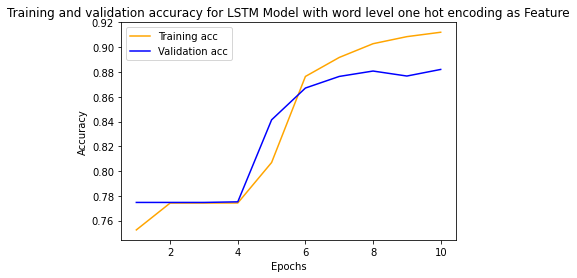

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

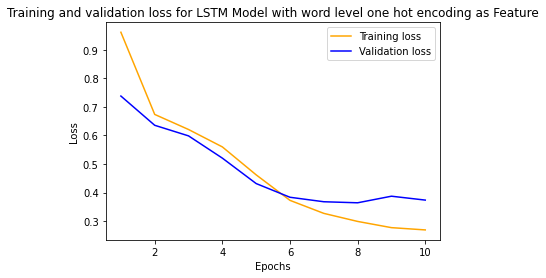

In [34]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.20353253185749054
Test accuracy: 0.9351194500923157


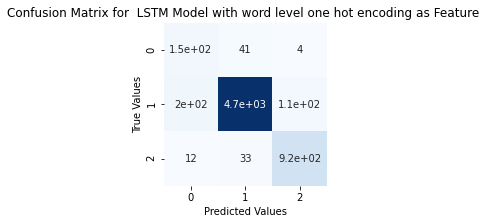

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig = plt.figure(figsize=(3, 3)) 

y_preds = model.predict(X_test) 

Y_pred = np.argmax(y_preds, 1) 
Y_test = np.argmax(y_test, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for  LSTM Model with word level one hot encoding as Feature ')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 20)          100000    
_________________________________________________________________
lstm (LSTM)                  (None, 15)                2160      
_________________________________________________________________
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               8192      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 111,891
Trainable params: 111,891
Non-trainable params: 0
__________________________________________________